#notes
'''
 - learning rate of 0.01 is causing vanishing gradients and generaitng very low accuracy
 - using more than 10 epochs is causing overfitting
 - increasing nodes in the hidden layer is causing very large increase of training time
 - 92 percent accuracy was achieved in one of the runs
'''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#function to convert ubyte files to csv files
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [ ]:
#converting ubyte training and testing files to csv files
convert("/content/drive/MyDrive/NewData/train-images.idx3-ubyte", "/content/drive/MyDrive/NewData/train-labels.idx1-ubyte",
        "/content/drive/MyDrive/NewData/mnist_train.csv", 60000)
convert("/content/drive/MyDrive/NewData/t10k-images.idx3-ubyte", "/content/drive/MyDrive/NewData/t10k-labels.idx1-ubyte",
        "/content/drive/MyDrive/NewData/mnist_test.csv", 10000)

In [ ]:
#creating training and testing lists from the contents of the csv files
train_file = open("/content/drive/MyDrive/NewData/mnist_train.csv", 'r')
train_list = train_file.readlines()
train_file.close()

test_file = open("/content/drive/MyDrive/NewData/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

In [ ]:
#shapes
print("Training images:", len(train_list))
print("Test images:", len(test_list))

Training images: 60000
Test images: 10000


In [ ]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
train_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

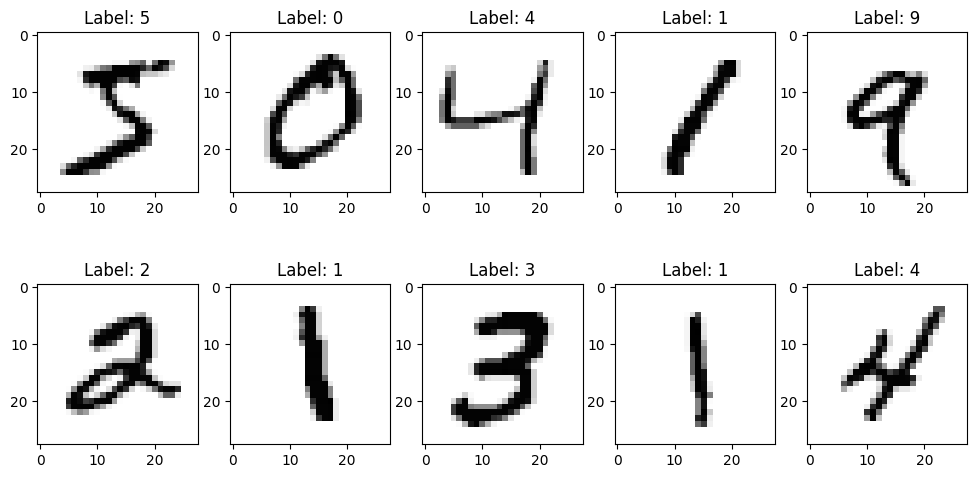

In [ ]:
# Create a figure and axis for the subplot grid
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

#plotting 10 images
for i in range(10):
    all_values = train_list[i].split(',')
    image_array = np.asfarray(all_values[1:]).reshape((28, 28))
    ax = axs[i // 5, i % 5]
    ax.set_title(label = f'Label: {all_values[0]}')
    ax.imshow(image_array, cmap='Greys', interpolation='None')
plt.show()

In [ ]:
# scale input to range 0.01 to 1.00
scaled_input_train = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [ ]:
#creating training and testing lists from the contents of the csv files
test_file = open("/content/drive/MyDrive/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

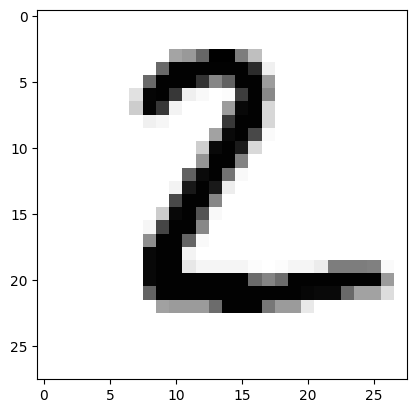

In [ ]:
#reshaping and plotting an image
all_values = test_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [ ]:
# scale input to range 0.01 to 1.00
scaled_input_test = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [ ]:
#sigmoid activation funtion
def sigmoid(x, derivative=False):
    if derivative:
        return (np.exp(-x)) / ((np.exp(-x) + 1) ** 2)
    return 1 / (1 + np.exp(-x))


#softmax activation function
def softmax(x, derivative=False):
    exps = np.exp(x - x.max())
    if derivative:
        return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps / np.sum(exps, axis=0)

In [ ]:
#scaling and intializing weights
def initialize_network(sizes, lr):
    input_layer = sizes[0]
    hidden_1 = sizes[1]
    output_layer = sizes[2]

    params = {
        'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
        'W2': np.random.randn(output_layer, hidden_1) * np.sqrt(1. / output_layer)
    }

    return params

In [ ]:
#forward propagation
def forward_pass(params, x_train):

    params['A0'] = x_train

    # input layer to hidden layer 1
    params['Z1'] = np.dot(params["W1"], params['A0'])
    params['A1'] = sigmoid(params['Z1'])

    # hidden layer 2 to output layer
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = softmax(params['Z2'])

    return params['A2']

In [ ]:
#backward propagation
def backward_pass(params, y_train, output):
    change_w = {}

    #W3 update calculation
    error = 2 * (output - y_train) / output.shape[0] * softmax(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])

    #W1 update calculation
    error = np.dot(params['W2'].T, error) * sigmoid(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error, params['A0'])

    return change_w

In [ ]:
#gradient descent
def update_network_parameters(params, changes_to_w, lr):
    for key, value in changes_to_w.items():
        params[key] -= lr * value

In [ ]:
#function for calculation accuracy
def compute_accuracy(params, test_data, output_nodes):
    predictions = []

    for x in test_data:
        all_values = x.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        output = forward_pass(params, inputs)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(targets))
    return np.mean(predictions)

In [ ]:
#training the model
def train_neural_network(train_list, test_list, sizes, epochs, lr, output_nodes):
    params = initialize_network(sizes, lr)

    start_time = time.time()

    for iteration in range(epochs):
        for x in train_list:
            all_values = x.split(',')
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = np.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            output = forward_pass(params, inputs)
            changes_to_w = backward_pass(params, targets, output)
            update_network_parameters(params, changes_to_w, lr)

        accuracy = compute_accuracy(params, test_list, output_nodes)
        print('Epoch: {0}, Time taken: {1:.2f}s, Accuracy: {2:.2f}%'.format(
            iteration + 1, time.time() - start_time, accuracy * 100
        ))

In [ ]:
sizes = [784, 128, 10]  # Input, hidden, output layer sizes
epochs = 10
learning_rate = 0.01
output_nodes = 10

train_neural_network(train_list, test_list, sizes, epochs, learning_rate, output_nodes)

Epoch: 1, Time taken: 82.25s, Accuracy: 78.24%
Epoch: 2, Time taken: 164.74s, Accuracy: 80.22%
Epoch: 3, Time taken: 241.38s, Accuracy: 81.11%
Epoch: 4, Time taken: 322.31s, Accuracy: 89.33%
Epoch: 5, Time taken: 400.69s, Accuracy: 90.12%
Epoch: 6, Time taken: 481.18s, Accuracy: 90.58%
Epoch: 7, Time taken: 559.16s, Accuracy: 90.85%
Epoch: 8, Time taken: 635.37s, Accuracy: 91.22%
Epoch: 9, Time taken: 711.43s, Accuracy: 91.53%
Epoch: 10, Time taken: 784.82s, Accuracy: 91.68%
